In [1]:
import pandas as pd
import numpy as np

# Load libraries

from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


df = pd.read_csv('../data/titanic/train.csv')
df_test = pd.read_csv('../data/titanic/test.csv')

df
df.isnull().any()

df.isnull().sum()



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [2]:
import matplotlib
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

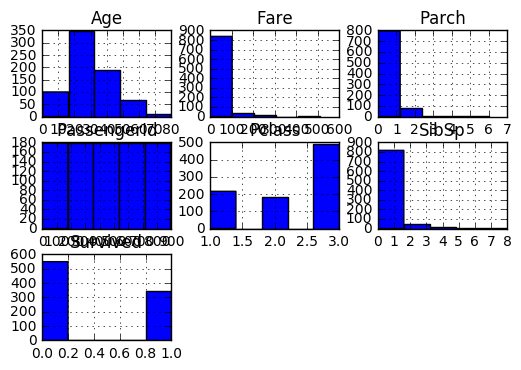

In [3]:
df.hist(bins=5)
plt.show()

In [4]:

df[df.Sex.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [5]:
#data exporation

df.describe

<bound method DataFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            

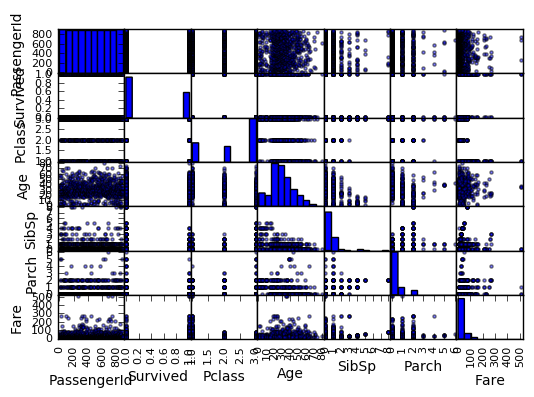

In [6]:
# scatter plot matrix
scatter_matrix(df)
plt.show()

In [7]:
print(df.describe)

<bound method DataFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            

In [8]:
X= df
X.shape
array = df.values
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [9]:
m= pd.get_dummies(df[['Sex']])
#X = pd.concat([m,df[['Pclass','Age','SibSp','Parch','Fare']]], axis=1)
X = pd.concat([m,df[['Pclass','SibSp','Parch','Fare']]], axis=1)
Y = df['Survived']
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)


In [10]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [11]:
# 5.3 Build Models
# We don’t know which algorithms would be good on this problem or what configurations to use. We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

# Let’s evaluate 6 different algorithms:

# Logistic Regression (LR)
# Linear Discriminant Analysis (LDA)
# K-Nearest Neighbors (KNN).
# Classification and Regression Trees (CART).
# Gaussian Naive Bayes (NB).

In [12]:

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.809038 (0.039034)
LDA: 0.804871 (0.042780)
KNN: 0.762754 (0.053729)
CART: 0.786600 (0.039698)
NB: 0.797848 (0.040286)


C:\Users\vikra\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


SVM: 0.764124 (0.084588)


In [13]:
# m= pd.get_dummies(df[['Sex']])
# r = pd.concat([m,df[['Pclass','Age','SibSp','Parch','Fare']]], axis=1)
# r

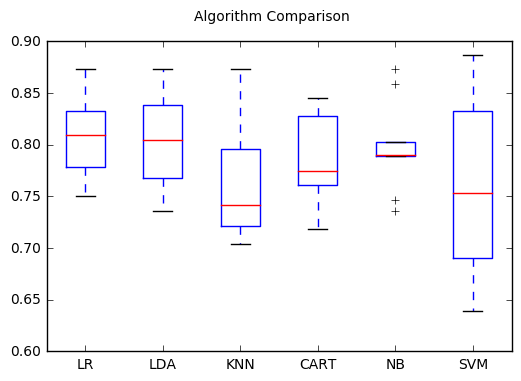

In [14]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [45]:
# # Make predictions on validation dataset
# knn = KNeighborsClassifier()
# knn.fit(X_train, Y_train)
# predictions = knn.predict(X_validation)
# predictions1 = knn.predict(df_test)
# print(accuracy_score(Y_validation, predictions))
# print(confusion_matrix(Y_validation, predictions))
# print(classification_report(Y_validation, predictions))
# print (predictions)
# predictions.shape

In [43]:
# # Make predictions on validation dataset
# knn = KNeighborsClassifier()
# knn.fit(X_train, Y_train)
# predictions = knn.predict(df_test)
# print (predictions)
# predictions.shape

In [41]:
df_test[[]]
X_validation

p= pd.get_dummies(df_test[['Sex']])
#X = pd.concat([m,df[['Pclass','Age','SibSp','Parch','Fare']]], axis=1)
X_vali = pd.concat([p,df_test[['Pclass','SibSp','Parch','Fare']]], axis=1)
X_vali.shape
# Make predictions on validation dataset


# print (predictions)
# predictions.shape
X_vali.isnull().any()
X_vali
X_valid = X_vali.fillna(0)
X_valid.isnull().any()


knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_valid)
print (predictions)


[0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0
 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 1 1 0 0 1 0 0 0]


In [42]:
q = df_test['PassengerId']

r = pd.DataFrame(predictions)

X_predicted = pd.concat([q,r], axis=1)

X_predicted.to_csv('titanic.csv')